# Python Classes, Functions, and Methods

Julie Butler Hartley

PHY 321: Classical Mechanics

March 18, 2021

In [184]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math

# Functions

## What is a function and why should you use them?
* In Python, a function is a block of code that runs only when it is called, can be passed inputs, and can return an output
* Anatomy of a Python function:
    * def and name
    * inputs/arguments (optional)
    * body of function
    * return statement (optional)
```python
def function_name (input1, input2):
        # Some code here
        # Indented with four spaces
        output1 = input1 + input2
        return output1
```

* Functions allow you to reuse code instead of having to copy and paste everytime you need it
    * A more sustainable and professional form of coding
    * Saves you time writing code and tracking down bugs

## A First Example: Making Reusable Code

In [185]:
# Time and position data
t = np.arange(0, 10)
x1 = t**2
x2 = -t**3 + t

Text(0.5, 1.0, 'Time versus Position')

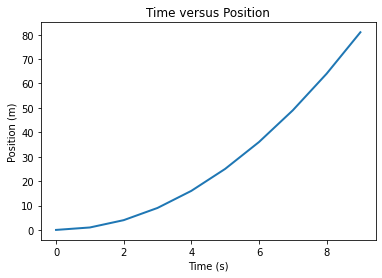

In [186]:
# Plot the first set of position data as a function of time
plt.plot(t, x1, linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Time versus Position")

Text(0.5, 1.0, 'Time versus Position')

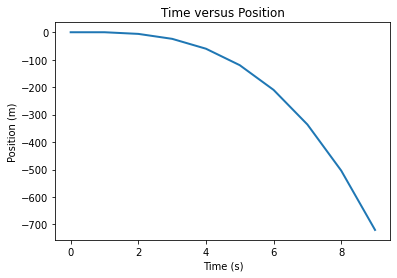

In [187]:
# Plot the second set of position data as a function of time
plt.plot(t, x2, linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Time versus Position")

We can take code that is commonly used by copy and paste and make it into a function so its much easier to reuse and less error prone (copy and paste errors, name change errors,...)!

In [188]:
def plot_position (x, y):
    """
        Inputs:
            x,y (NumPy arrays or lists): data to be plotted
        Returns:
            None.
        Plots y as a function of x.  Assumes x is time data and
        y is position data.
    """
    plt.plot(x, y, linewidth=2)
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.title("Time versus Position")
    plt.show()

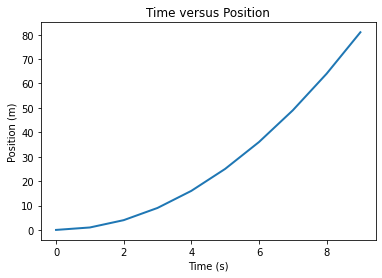

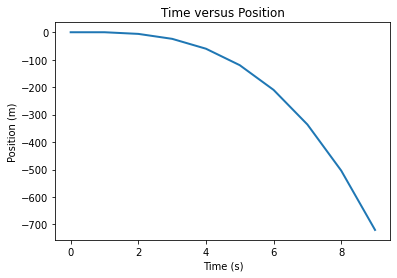

In [189]:
# Plot the first set of position data
plot_position(t,x1)
# Plot the second set of position data
plot_position(t, x2)

## Useful Tip: Default Arguments

You can set default values for the inputs to a function.  The function will use these default values if no inputs are passed.

Note: if you do not set default values and also do not pass in arguments this will cause an error

In [190]:
def plot_position (x = [0, 1, 2], y = [0, 1, 2]):
    """
        Inputs:
            x,y (NumPy arrays or lists): data to be plotted.  Note, 
                have default values.
        Returns:
            None.
        Plots y as a function of x.  Assumes x is time data and y 
        is position data.
    """
    plt.plot(x, y, linewidth=2)
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.title("Time versus Position")
    plt.show()

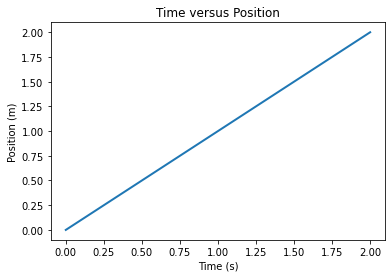

In [191]:
plot_position()

Default arguments are useful if you know you will be passing in the same value for an argument many times.  For example:

In [192]:
def velocity (t, v0=0, a=-9.81):
    return a*t + v0

In [193]:
print(velocity(2))
print(velocity(2, 0, -9.81))
print(velocity(2, 10, 2.4))

-19.62
-19.62
14.8


## Useful Tip: Error Handling
* Many times there are conditions on the arguments to a function that will cause the code to crash if they are not met.
* Error handling is a way to deal with these errors in a neater way then just letting the program crash.
    * Makes tracking down errors significantly easier
    * More professional and makes your code easier to operate by other user

ValueError: x and y must have same first dimension, but have shapes (2,) and (4,)

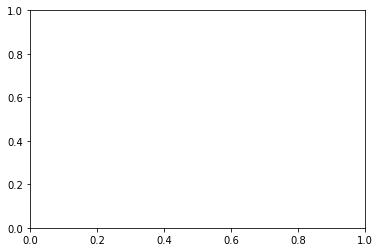

In [194]:
plot_position([1, 2], [1, 2, 3, 4])

## Method 1: Assert Statement

In [195]:
def plot_position (x = [0, 1, 2], y = [0, 1, 2]):
    """
        Inputs:
            x,y (NumPy arrays or lists): data to be plotted.  
                Note, have default values.
        Returns:
            None.
        Plots y as a function of x.  Assumes x is time data and
            y is position data.
    """
    assert len(x) == len(y)
    plt.plot(x, y, linewidth=2)
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.title("Time versus Position")
    plt.show()

In [196]:
plot_position([1, 2], [1, 2, 3, 4])

AssertionError: 

Can also use assert statements to make sure inputs are the correct type

In [197]:
def plot_position (x = [0, 1, 2], y = [0, 1, 2]):
    """
        Inputs:
            x,y (lists): data to be plotted.  Note, have 
                default values.
        Returns:
            None.
        Plots y as a function of x.  Assumes x is time data 
            and y is position data.
    """
    assert isinstance(x, list) and isinstance(y, list)    
    assert len(x) == len(y)
    plt.plot(x, y, linewidth=2)
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.title("Time versus Position")
    plt.show()

In [198]:
plot_position(1, 2)

AssertionError: 

## Method 2: Try/Except Statement
* A bit neater because you can have custom error messages instead of just `AssertionError` and a stack trace

In [199]:
def plot_position (x = [0, 1, 2], y = [0, 1, 2]):
    """
        Inputs:
            x,y (NumPy arrays or lists): data to be plotted.  Note, 
                have default values.
        Returns:
            None.
        Plots y as a function of x.  Assumes x is time data and y
            is position data.
    """
    try:
        plt.plot(x, y, linewidth=2)
        plt.xlabel("Time (s)")
        plt.ylabel("Position (m)")
        plt.title("Time versus Position")
        plt.show()
    except:
        print("Plotting Error!")
        print("Given values are not valid for a Matplotlib plot statement.")
        print("x and y must be lists of NumPy arrays of the same length.")


Plotting Error!
Given values are not valid for a Matplotlib plot statement.
x and y must be lists of NumPy arrays of the same length.


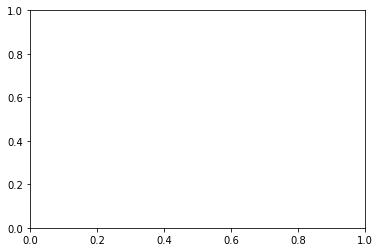

In [200]:
plot_position([1],[2,3])

# Writing A Function for Euler's Method

## Define a couple functions that model acceleration

In [201]:
def drag_acceleration_1D (v):
    """
        Inputs:
            v (a float or int): a velocity at a given point
        Returns:
            unnamed (a float): the acceleration at the same point
        Calculates the acceleration at a point givent the velocity
        at that point.  The acceleration calculated is due to near 
        earth gravity and drag.
    """
    assert isinstance(v, float) or isinstance(v, int)
    return -9.81 + 0.0245*v*v

In [202]:
def gravity_acceleration_1D (v):
    """
        Inputs:
            v (a float or int): a velocity at a given point
        Returns:
            unnamed (a float): the acceleration at the same point
        Calculates the acceleration at a point givent the velocity 
        at that point.  The acceleration calculated is due to near
        earth gravity.
    """
    assert isinstance(v, float) or isinstance(v, int)    
    return -9.81

## Euler's Method

In [203]:
def euler (x0, v0, t0, tf, dt, acceleration, minimum_x = -np.inf):
    """
        Inputs:
            x0, v0, t0, tf, dt (ints or floats): the initial position, the initial
                velocity, the initial time, the final time, and the time step
            acceleration (a function): the name of a function that models the 
                acceleration.  Must take one argument (velocity at a point).
            minimum_x (an int or float): the minimum value the position can have.
                Default value is -infinity.
        Returns:
            t, a, v, x (NumPy arrays): the time, acceleration, velocity, and position
                at each time step.
        Uses Euler's method to solve for the velocity and position of an object given 
        only a function for the acceleration and initial conditions.
    """
    # Check the inputs and make sure they are if the appropriate type
    assert isinstance(x0, float) or isinstance(x0, int)
    assert isinstance(v0, float) or isinstance(v0, int)
    assert isinstance(t0, float) or isinstance(t0, int)
    assert isinstance(tf, float) or isinstance(tf, int)
    assert isinstance(dt, float) or isinstance(dt, int)
    assert isinstance(minimum_x, float) or isinstance(minimum_x, int)
    assert isinstance(verbose, bool)

    # Calculate the number of integration points
    n = int(math.ceil((tf-t0)/dt))

    # Set up the data arrays with initial values
    a = np.zeros(n)
    v = np.zeros(n)
    x = np.zeros(n)
    t = np.zeros(n)
    a[0] = acceleration(v0)
    v[0] = v0
    x[0] = x0
    t[0] = t0
    
    # Loop through all time steps
    for i in range(0, n-1):
        # Update the position
        x[i+1] = x[i] + dt*v[i]
        # Update the velocity
        v[i+1] = v[i] + dt*a[i]
        # Update the time
        t[i+1] = t[i] + dt
        # Update the acceleration, catch invalid functions
        try:
            a[i+1] = acceleration(v[i+1])
        except:
            print("Function for acceleration is not of correct form.")
            print ("Acceleration function must take one argument, the velocity at a point")
            print("and return the acceleration at the point as an int or float.")
        # Break if new position is below the minimum value
        if x[i+1] < minimum_x:
            # Truncate the arrays only to contain values that have
            # acceptable positions
            x = x[:i]
            v = v[:i]
            a = a[:i]
            t = t[:i]
            # Break the loop
            break
    return t, a, v, x

## Testing Our Function

In [204]:
t_grav, a_grav, v_grav, x_grav = euler (x0=100, v0=0, t0=0, tf=10, dt=0.01, acceleration=gravity_acceleration_1D, minimum_x = 0.0)

NameError: name 'verbose' is not defined

In [205]:
t_drag, a_drag, v_drag, x_drag = euler (100, 0, 0, 10, 0.01, drag_acceleration_1D, 0.0)

NameError: name 'verbose' is not defined

### Visualize Results Using the Plot Function from Above

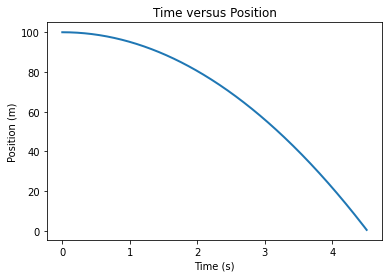

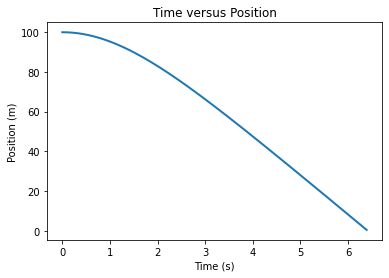

In [206]:
plot_position(t_grav, x_grav)
plot_position(t_drag, x_drag)

# Classes and Methods

* Informal definition: a class is a collection of functions and variables that work together to solve a problem
* Formal definition: Object-oreinted programming -- A class makes an object which is an instance of a class.  
    * Python is an object oriented language even if it is not enforced
        * C++, Java
    * An object/instance is a programming structure which contains functionality that is accessed via a dot
        * object_name.function_name
    * Think of it as a variable that contains all the functionality within the class but with its own set of variable values.
* Methods are just functions that are contained inside a class (though casually method and function are interchangeable and the meaning changes between programming languages)
    * The first argument of a method has to be `self`.  This tells Python that the method belongs to the class.
    * If you reference the method inside the class you have to add `self.` to the beginning of the name:
    ```python
    def method_2(self, x):
        a = self.method_1()
    ```
* A special method is called the initializer and is used to __initialize__ an instance of the class (make an object of that class).  The is the first method in a class and has the name `__init__`.  It also needs the argument `self` and can have other arguments.
* A class can also have class level variables.  These are variables that are set up in the initializer method and can be accessed anywhere in the class.  These variables also need to have `self.` before their names: `self.class_level_variable`.

## A Simple Class Example

In [207]:
class BasicMath ():
    def __init__(self, a, b):
        self.a = a
        self.b = b
        print("BasicMath object has been created!")
        
    def add (self):
        return self.a + self.b
    
    def subtract (self):
        return self.a - self.b
    
    def add_then_exponent (self, power):
        return self.add()**power
        

### Let's make an instance of our class!

In [208]:
basicmath = BasicMath (2, 3)

BasicMath object has been created!


In [209]:
print(basicmath.add())
print(basicmath.subtract())
print(basicmath.add_then_exponent(2))

5
-1
25


## A Longer Example: The Path of A Golfball

In [210]:
class GolfBall ():
    """
        Models the flight path of a golfball given some time step, 
        initial velocity, and angle of launch.
    """
    def __init__ (self, dt):
        """
            Inputs:
                dt (a float or in): the time step
            Returns:
                None.
            Initializes the golfball class
        """
        # Check the inputs and make sure they are if the appropriate type
        assert isinstance(dt, float) or isinstance(dt, int)
        # Make two class level variables, the time step and the flight path
        self.dt = dt
        self.r = []
        
    def analytical (self, vi, theta):
        """
            Inputs:
                vi, theta (ints or floats): the initial velocity and launch
                    angle of the golfball.  Note, theta must be in degrees.
            Returns: 
                None.
            Analyzes the flight of a golfball using an analytical approach and
            prints the maximum valueS of position in direction. 
        """
        # Check the inputs and make sure they are if the appropriate type
        assert isinstance(vi, float) or isinstance(vi, int)
        assert isinstance(theta, float) or isinstance(theta, int)        
        # Convert angle to radians
        theta_rad = np.radians(theta)
        # Use analytical formula to find final time and set up time array
        tf = vi*np.sin(theta_rad)/4.9
        t = np.arange(0,tf,self.dt)
        # Use analytical formulas to model the position
        x = t*vi*np.cos(theta_rad)
        y = 0*t
        z = t*vi*np.sin(theta_rad)-9.81/2*t**2
        # Save the results in the class level variable
        self.r = [x, y, z]
        # Find the maxumum values in each of the directions using analytical formulas
        print("Maximum x:", tf*vi*np.cos(theta_rad))
        print("Maximum y:", 0)
        print("Maximum z:", (tf/2.0)*vi*np.sin(theta_rad)-9.81/2*(tf/2.0)**2)
        
    def euler (self, vi, theta, tf):
        """
            Inputs:
                vi, theta (ints or floats): the initial velocity and launch angle
                    of the golfball.  Note theta must be in degrees.
                tf (an int or float): the largest possible time, needed to calcualate
                    the number of integration points
            Returns: 
                None.
            Analyzes the flight of a golfball using an numerical approach and prints
            the maximum values of position in direction. 
        """  
        # Check the inputs and make sure they are if the appropriate type
        assert isinstance(vi, float) or isinstance(vi, int)
        assert isinstance(theta, float) or isinstance(theta, int)
        assert isinstance(tf, float) or isinstance(tf, int)        
        # Calculate the number of integration points
        n = int(math.ceil((tf)/self.dt))
        # Convert angle to radians
        theta_rad = np.radians(theta)

        # Set up the class level arrays with initial values
        a = np.zeros((n,3))
        v = np.zeros((n,3))
        x = np.zeros((n,3))
        t = np.zeros(n)
        a[0] = np.asarray([0, 0, -9.81])
        v[0] = np.asarray([vi*np.cos(theta_rad), 0, vi*np.sin(theta_rad)])
        x[0] = np.asarray([0, 0, 0])
        t[0] = 0

        # Loop through all time steps
        for i in range(0, n-1):
            # Update the position
            x[i+1] = x[i] + self.dt*v[i]
            # Update the velocity
            v[i+1] = v[i] + self.dt*a[i]
            # Update the time
            t[i+1] = t[i] + self.dt
            # Update the acceleration
            a[i+1] = [0, 0, -9.81]
            # Break if new position is below the minimum value
            if x[i+1][2] < 0.0:
                # Truncate the arrays only to contain values that have
                # acceptable positions
                x = x[:i]
                v = v[:i]
                a = a[:i]
                t = t[:i]
                # Break the loop
                break
        # Save the position as the class level variable.  
        #Need to transpose so its in the same form as the
        # analytical method
        self.r = x.T
        # Find the maximum values in each direction using the np.max function
        print("Maximum x:", np.max(self.r[0]))
        print("Maximum y:", np.max(self.r[1]))
        print("Maximum z:", np.max(self.r[2]))
        
    def graph_position (self, label=''):
        """
            Inputs:
                label (a string): the text for the legend.  Default value 
                    is empty string
            Returns:
                None.
            Graphs the flight trajectory on a 3D plot.
        """
        # Make sure input is correct type
        assert isinstance(label, str)
        # Set up graph
        fig = plt.axes(projection='3d')
        fig.set_xlabel('x')
        fig.set_ylabel('y')
        fig.set_zlabel('z')
        # Graph the flight path, add label and legend
        fig.scatter(self.r[0],self.r[1],self.r[2], label=label)
        plt.legend()

### Testing the New Class

Maximum x: 10.204081632653061
Maximum y: 0
Maximum z: 2.5484173261141185


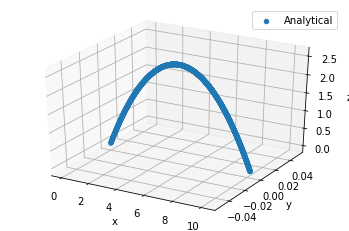

In [211]:
# make instance of GolfBall class
GB = GolfBall (0.001)
# perform and graph analytical analysis
GB.analytical(10, 45)
GB.graph_position("Analytical")

Maximum x: 10.189408716898209
Maximum y: 0.0
Maximum z: 2.551956292355037


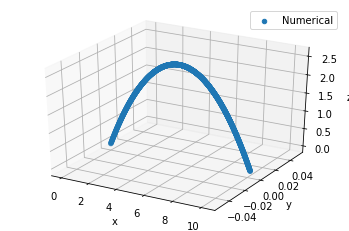

In [212]:
# Perform and graph numerical analysis
GB.euler(10, 45, 10)
GB.graph_position("Numerical")

## Tip: Importing Functions and Classes from Other files
* Assume the class `MyClass` and the function `MyFunction` (outside of MyClass) are stored in the file `MyFile.py`.  The class and function can be imported in the following ways (Assuming MyFile is in the same directory):

Method 1
```python
import MyFile as file
class_object = file.MyClass(......)
file.MyFunction(....)
```


Method 2
```python
from MyFile import MyClass
from MyFile import MyFunction
class_object = MyClass(......)
MyFunction(....)
```


Method 3
```python
from MyFile import *
class_object = MyClass(......)
MyFunction(....)
```

# Writing Good Code

## Aspects of Well-Written Python Code
* Well documented -- comments and docstrings
    * Every class, method, and function needs a docstring that describes the inputs, return values, and functionality
    * Every chunk of code should have a comment that describes its function
* Variables have meaningful names
```python
t = 5
temperature = 5
```
* In addition, have a consistent naming convention:
    * Class names are in LeadingCapitalCamelCase
    * function, method, and variable names are in all_lowercase_underscore
    
* Use whitespace to separate code to make more readable, but do not add too many empty lines
```python
    def add (self):
        return self.a + self.b
    def subtract (self):
        return self.a - self.b
```
```python
    def add (self):
        return self.a + self.b
    
    def subtract (self):
        return self.a - self.b
```   
* Use consistent indentation to define code blocks and easily see corresponding code blocks
```python
if 1 > 0:
  print ("in if")
else:
    print("in else")
```
```python
if 1 > 0:
    print ("in if")
else:
    print("in else")
```    
* Follow PEP8 guidelines!

## Why should you write good code?
* It's easier to read--both for another person and for later you
* It's more sustainable and saves you time
* It can be reused later for similar types of problems
* It's more professional 

## When should you make something into a function:
* If there is some small piece of code that is used a lot, with or without changing values
    * plotting different values, solvers, potentials, forces
* If you find yourself copying and pasting (NEVER COPY AND PASTE)

## When should you make something into a class:
* If you have many related functions that are used together
* If you have a large piece of code that does multiple things that is used alot (break different pieces into different functions)

## Resources for Writing Proper Python Code
* Effective Python--Brett Slatkin

## Homework 8 Bonus (20 pts.)

* Make a class called Solvers which contains the following:
    * An initializer
    * A method that implements Euler's method in 2D
    * A method that implements Euler-Cromer's method in 2D
    * A method that implements Velocity-Verlet in 2D
    * A method that plots position versus time results from the solver
    * At least three class level variables
    * The class may also contain any other methods or class level variables that you think are needed.
* Make a function (outside of the class Solver) that solve's the Earth-Sun problem using the Solvers class (Exercise 6 from Homework 5).